In [1]:
%matplotlib nbagg

In [2]:
import jefimenko
import numpy as np

Jefimenko version 0.0.1


In [3]:
def test_charge_1():
    mapping = jefimenko.Grid(1,   # creat a 1D grid
                delta=[1],  # this is the size of a step in x, y and z in meters
                size=[10],  # this is the size of the grid in meters
                time=3 * 3.36 * 10**-9,  # this is the length of a simulation in secounds
                delta_t=3.36 * 10**-9  # this is the size of a full time step
        )
 
    mapping.Add_Charge([0], Q = 1)
    jefimenko.plot_grid(mapping)

    jefimenko.simulate(mapping)

    if(mapping.grid['E'][0][1] == [0, 0, 0]).all():
        print("time == 0 R == 1 E field PASS")
    else:
        print("time = 0 R == 1 E field FAIL")

    if(mapping.grid['H'][0][1] == [0, 0, 0]).all():
        print("time == 0 R == 1 H field PASS")
    else:
        print("time == 0 R == 1 H field FAIL")

    test_array = [8987551787.368176, 0, 0]

    if (mapping.grid['E'][1][1] - test_array < .01).all():
        percent = (np.linalg.norm(mapping.grid['E'][1][1] - 8987551787.368176) / 8987551787.368176)
        print("time == 1 R == 1 PASS")
        # print("E field is within " + str(percent) + " percent at time = 1")
        # print("E field is " + str(mapping.grid['E'][1][1]))
    else:
        print("time == 0 R == 1 FAIL")   

    test_array = [2246887946.842, 0, 0]
    if (mapping.grid['E'][1][2] - test_array < .01).all():
        print("time == 1 R == 2 Pass")
    else:
        print("time == 1 R == 2 Fail")
        print(mapping.grid['E'][1][2])
        
    if(mapping.grid['H'][1][1] == [0, 0, 0]).all():
        print("time == 1 R == 1 H field PASS")
    else:
        print("time == 1 R == 1 H field FAIL")
    #for t in range(mapping.time_size):
    #    jefimenko.plot_EM_grid('E', mapping, time=t)

    #field = jefimenko.print_location(mapping.grid['E'][1], [1, 0], mapping)
    #print(field)

location = [0]Q = 1


<IPython.core.display.Javascript object>


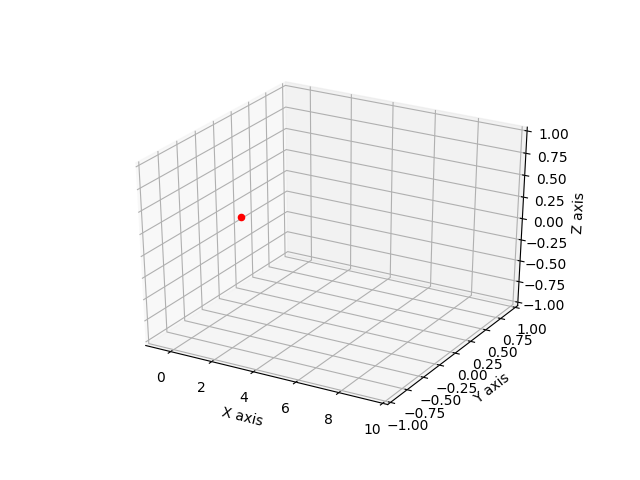

shape = 1
simulating grid
grid simulated
time == 0 R == 1 E field PASS
time == 0 R == 1 H field PASS
time == 1 R == 1 PASS
time == 1 R == 2 Pass
time == 1 R == 1 H field PASS


In [4]:
test_charge_1()

In [5]:
def test_current_1():
    mapping = jefimenko.Grid(1,   # creat a 1D grid
                delta=[1],  # this is the size of a step in x, y and z
                size=[10],  # this is the size of the grid in meters
                time=3 * 3.36 * 10**-9,  # this is the length of a simulation in secounds
                delta_t=3.36 * 10**-9  # this is the size of a full time step
        )
    mapping.Add_Current([0],
                    direction=[0, 0, 1],
                    Amps=1/(np.linalg.norm(mapping.delta)))

    jefimenko.plot_grid(mapping)

    for i in range(len(mapping.currents[0])):
        print('amps = ' + str(mapping.currents[0][i].amps))
        print('direction = ' + str(mapping.currents[0][i].direction))
        print('location = '+ str(mapping.currents[0][i].location))
        print('')
    jefimenko.simulate(mapping)

    if(mapping.grid['H'][0][1] == [0, 0, 0]).all():
        print("time == 0 PASS")
    else:
        print("time == 0 Fail")
    test_array = [0, 2*10**-7, 0]

    percent = abs((np.linalg.norm(mapping.grid['H'][1][1] - test_array) / (2*10**-7)) * 100)

    # print("H field is within " + str( percent) + " percent at time = 1")

    if percent <= 1:
        print("time == 1 R == 1 PASS")
    else:
        print("time = 1 FAIL")
        print(mapping.grid['H'][1][1][1])

    test_array = [0, 1*10**-7, 0]
    percent = abs((np.linalg.norm(mapping.grid['H'][2][2] - test_array) / (1*10**-7)) * 100)

    print("H field is within " + str( percent) + " percent at time = 2 R == 2")

    if percent <= 1:
        print("time == 2 R == 2 PASS")
    else:
        print("time = 2 FAIL")
        print(mapping.grid['H'][2][2][1])   

    # print("at time = 1 the field is " + str(mapping.grid['H'][1][1]))
    # print("H field is " + str(mapping.grid['H'][1][1][1]))
    # print(test_array)

    # for t in range(mapping.time_size):
    #     jefimenko.plot_EM_grid('H', mapping, time=t)

    # for T in range(2):
    #     print(T)
    #     field = jefimenko.print_location(mapping.grid['H'][T], [1], mapping)
    #     print(field)

location = [0]amps = 1.0


<IPython.core.display.Javascript object>


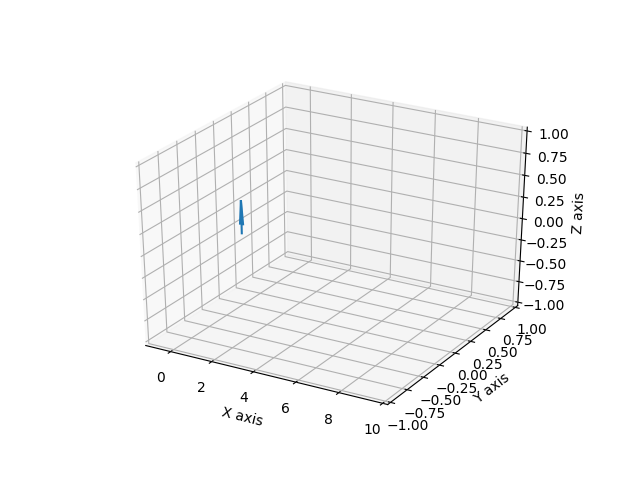

shape = 1
amps = 1.0
direction = [0. 0. 1.]
location = [0.]

simulating grid
grid simulated
time == 0 PASS
time == 1 R == 1 PASS
H field is within 1.3234889800848443e-14 percent at time = 2 R == 2
time == 2 R == 2 PASS


In [6]:
test_current_1()

In [7]:
def test_current_2():
    mapping = jefimenko.Grid(1,   # creat a 1D grid
                delta=[1],  # this is the size of a step in x, y and z
                size=[100],  # this is the size of the grid in meters
                time=100 * 3.36 * 10**-9,  # this is the length of a simulation in secounds
                delta_t=3.36 * 10**-9  # this is the size of a full time step
        )
    mapping.Add_Current([0],
                    direction=[0, 0, 1],
                    Amps=1/(np.linalg.norm(mapping.delta)))

    jefimenko.plot_grid(mapping)

    for i in range(len(mapping.currents[0])):
        print('amps = ' + str(mapping.currents[0][i].amps))
        print('direction = ' + str(mapping.currents[0][i].direction))
        print('location = '+ str(mapping.currents[0][i].location))
        print('')
    jefimenko.simulate(mapping)


    # for t in range(mapping.time_size):
    #     jefimenko.plot_EM_grid('H', mapping, time=t)


    #for t in range(mapping.time_size):
    #    jefimenko.plot_EM_grid('H', mapping, time=t)
    jefimenko.plot_EM_grid('H', mapping, time=99)

    # for T in range(2):
    #     print(T)
    #     field = jefimenko.print_location(mapping.grid['H'][T], [1], mapping)
    #     print(field)

location = [0]amps = 1.0


<IPython.core.display.Javascript object>


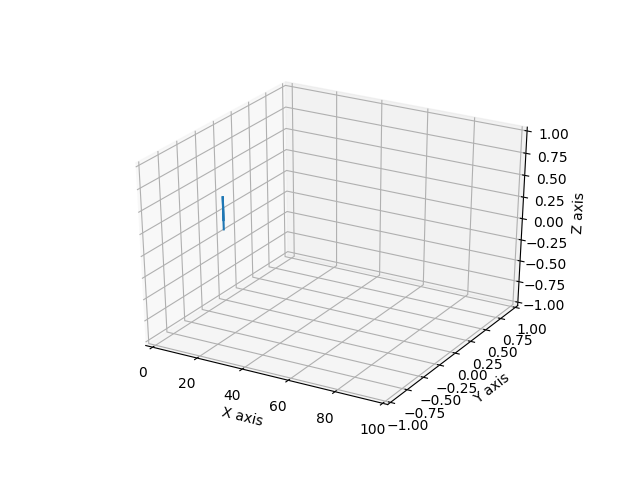

shape = 1
amps = 1.0
direction = [0. 0. 1.]
location = [0.]

simulating grid
grid simulated


<IPython.core.display.Javascript object>


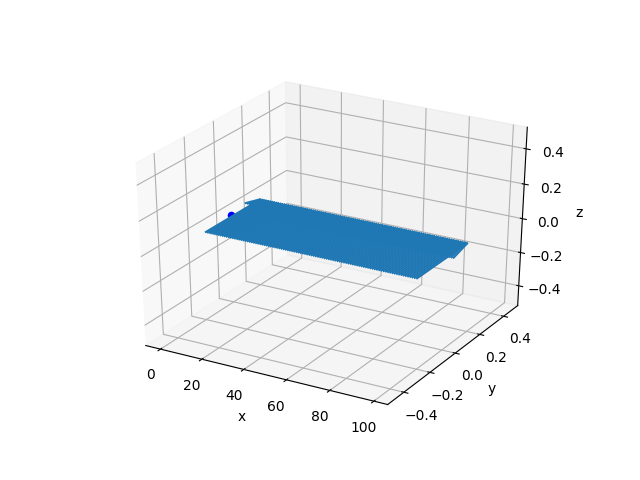

The acutal time is 3.3264e-07


In [8]:
test_current_2()
